In [84]:
import pandas as pd
import numpy as np
import networkx as nx
from ts2vg import NaturalVG
import matplotlib.pyplot as plt
from collections import Counter
import powerlaw
from math import log2

In [85]:
df = pd.read_csv("./.datasets/BTC-Daily.csv")

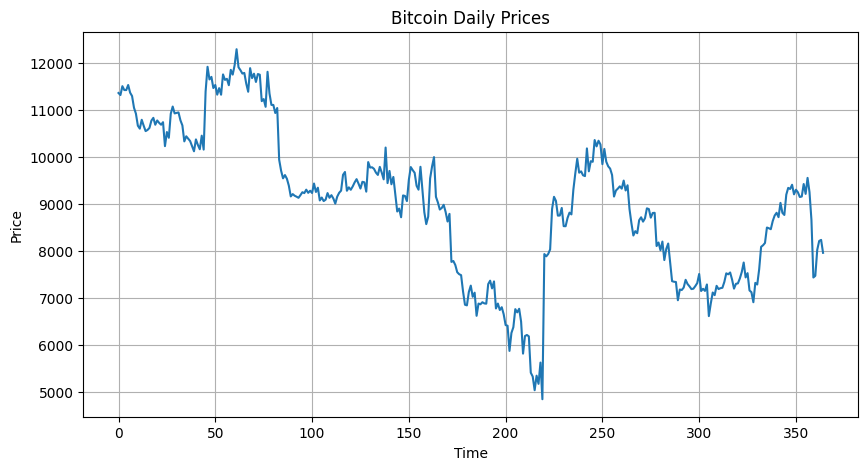

In [86]:
prices = df["close"].values[500:865]

plt.figure(figsize=(10, 5))
plt.plot(prices)
plt.title("Bitcoin Daily Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [87]:
vg = NaturalVG()
vg.build(prices)
G = nx.DiGraph()
for i, j in vg.as_networkx().edges():
    if i < j:
        G.add_edge(i, j)  
    else:
        G.add_edge(j, i,)

In [88]:
degrees = [d for n, d in G.in_degree()]
fit = powerlaw.Fit(degrees, discrete=True)
print(f"Alpha (scaling exponent): {fit.alpha}")
print(f"Xmin (cutoff): {fit.xmin}")

Calculating best minimal value for power law fit
Alpha (scaling exponent): 2.4367709956959205
Xmin (cutoff): 7.0


Values less than or equal to 0 in data. Throwing out 0 or negative values


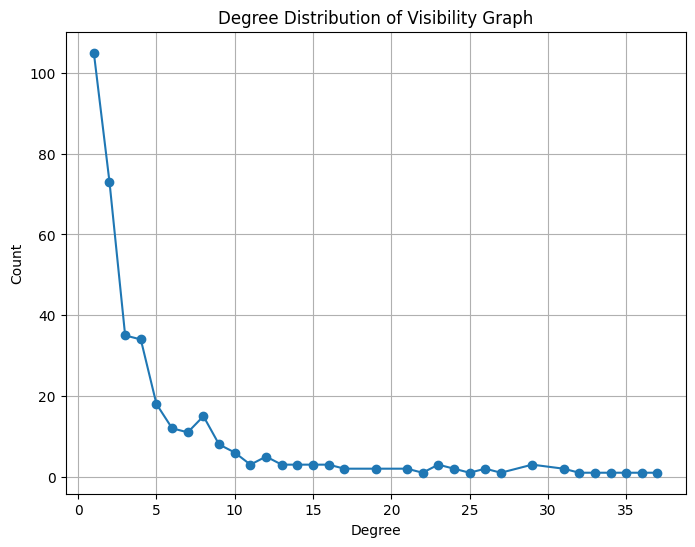

In [89]:
degree_counts = np.bincount(degrees)
degree_values = np.nonzero(degree_counts)[0]
counts = degree_counts[degree_values]

non_zero_mask = degree_values > 0
degree_values = degree_values[non_zero_mask]
counts = counts[non_zero_mask]

plt.figure(figsize=(8, 6))
plt.plot(degree_values, counts, marker='o', linestyle='-', color='tab:blue')
plt.title("Degree Distribution of Visibility Graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [90]:
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")

Average Clustering Coefficient: 0.3649


In [ ]:
degrees = [d for n, d in G.degree()] 
degree_counts = Counter(degrees)
total = sum(degree_counts.values())
def shannon_entropy(counts):
    probs = [count / total for count in counts]
    return -sum(p * log2(p) for p in probs if p > 0)

entropy = shannon_entropy(degree_counts.values())
print(f"Network Entropy (Shannon): {entropy:.4f}")

Network Entropy (Shannon): 4.5341
